## Initial Pre-training of Weights

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

ModuleNotFoundError: No module named 'fastai'

In [5]:
bs = 32

In [6]:
path = Path('/storage/brain_tumor_dataset/')
path.ls()

NameError: name 'Path' is not defined

In [7]:
fnames = get_image_files(path)

NameError: name 'get_image_files' is not defined

In [8]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=128,
                                  bs = bs, valid_pct=0.2).normalize(imagenet_stats)

NameError: name 'ImageDataBunch' is not defined

In [9]:
data.show_batch(rows=3, figsize=(7,6))

NameError: name 'data' is not defined

In [10]:
data

NameError: name 'data' is not defined

In [11]:
print(data.classes)
len(data.classes),data.c

NameError: name 'data' is not defined

### Training: resnet34

In [12]:
learn = cnn_learner(data, 
                    models.resnet34, 
                    metrics=[error_rate, dice, accuracy], 
                    callback_fns = ShowGraph)

NameError: name 'cnn_learner' is not defined

In [13]:
learn.fit_one_cycle(10)

NameError: name 'learn' is not defined

In [14]:
learn.save('stage-1')

NameError: name 'learn' is not defined

### Results

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

NameError: name 'ClassificationInterpretation' is not defined

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

NameError: name 'interp' is not defined

In [17]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

NameError: name 'interp' is not defined

### Unfreeze

In [18]:
learn.unfreeze()

NameError: name 'learn' is not defined

In [19]:
learn.lr_find()

NameError: name 'learn' is not defined

In [20]:
learn.recorder.plot()

NameError: name 'learn' is not defined

In [21]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-3))

NameError: name 'learn' is not defined

In [22]:
learn.save('stage-2')

NameError: name 'learn' is not defined

## Training: resnet50

In [23]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid_pct=0.2,
                                   size=128, bs=bs//2).normalize(imagenet_stats)

NameError: name 'ImageDataBunch' is not defined

In [24]:
learn = cnn_learner(data,
                    models.resnet50, 
                    metrics=[error_rate, dice, accuracy],
                    callback_fns = ShowGraph)

NameError: name 'cnn_learner' is not defined

In [25]:
learn.lr_find()
learn.recorder.plot()

NameError: name 'learn' is not defined

In [26]:
learn.fit_one_cycle(10)

NameError: name 'learn' is not defined

In [27]:
learn.save('stage-1-50')

NameError: name 'learn' is not defined

In [28]:
learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-4))

NameError: name 'learn' is not defined

In [25]:
learn.save('stage-2-50')

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

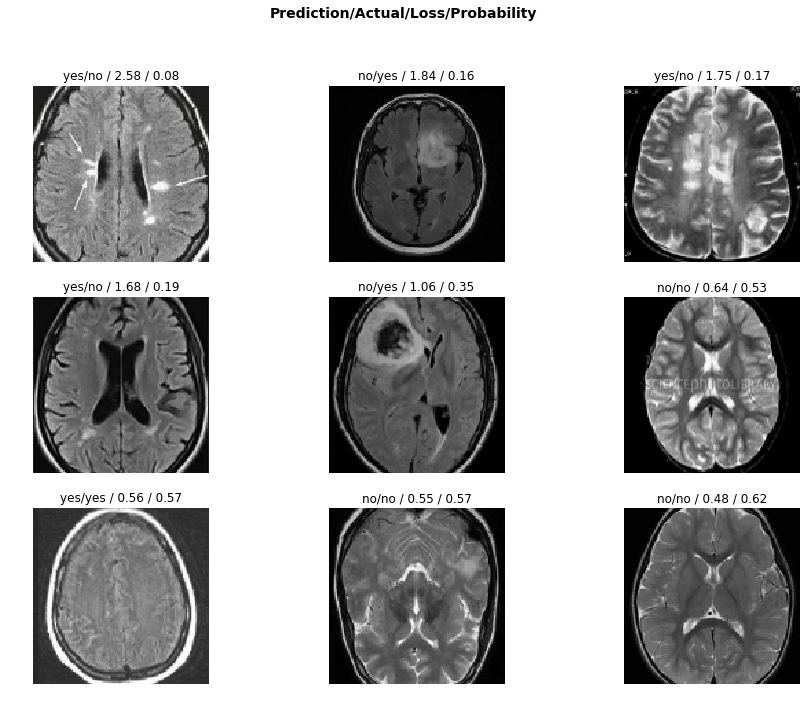

In [27]:
interp.plot_top_losses(9, figsize=(15,11))

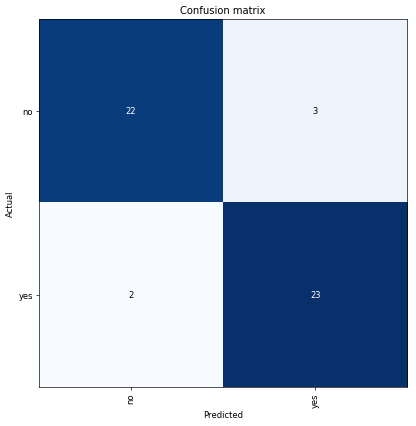

In [28]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

## Transfer Learning to FLAIR Segmentation

### Size = 64

In [5]:
path = Path('/storage/brats2013/brain_segmentation')

In [6]:
train = path/'train'
valid = path/'valid'

In [7]:
from torch.utils.data import Dataset, DataLoader

In [8]:
re = r'(\w+.png)*$'

In [9]:
def create_databunch(path, size, batch_size, regex = None):
    dataset = ImageList.from_folder(path).split_by_folder()
    ds_tfms = dataset.label_from_re(regex).transform(get_transforms(), size=size)
    return ds_tfms.databunch(bs = batch_size)

In [10]:
data = create_databunch(path, size = 64, batch_size = 32, regex = re)

In [11]:
data

ImageDataBunch;

Train: LabelList (2125 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
False.png,False.png,True.png,True.png,False.png
Path: /storage/brats2013/brain_segmentation;

Valid: LabelList (1415 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
True.png,True.png,True.png,True.png,True.png
Path: /storage/brats2013/brain_segmentation;

Test: None

In [12]:
learn = cnn_learner(data,
                    models.resnet34, 
                    metrics=[error_rate, dice, accuracy],
                    callback_fns = ShowGraph)

In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

epoch,train_loss,valid_loss,error_rate,dice,accuracy,time
0,0.811252,0.517295,0.256537,0.743463,0.743463,00:05
1,0.708885,0.384610,0.202120,0.797880,0.797880,00:04
2,0.609087,0.371412,0.185159,0.814841,0.814841,00:04
3,0.571939,0.376021,0.192933,0.807067,0.807067,00:03
4,0.554795,0.378006,0.185866,0.814134,0.814134,00:03
5,0.539775,0.340019,0.154770,0.845230,0.845230,00:03
6,0.527244,0.335730,0.164664,0.835336,0.835336,00:03
7,0.521541,0.319412,0.149823,0.850177,0.850177,00:04
8,0.508650,0.319177,0.147703,0.852297,0.852297,00:03
9,0.507368,0.324817,0.158304,0.841696,0.841696,00:03


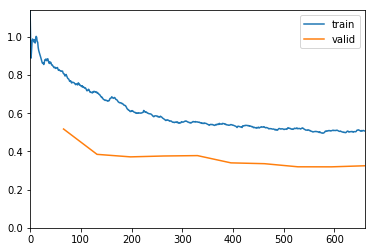

In [14]:
learn.fit_one_cycle(10)

In [15]:
learn.save('stage-1-34-s64')

In [89]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

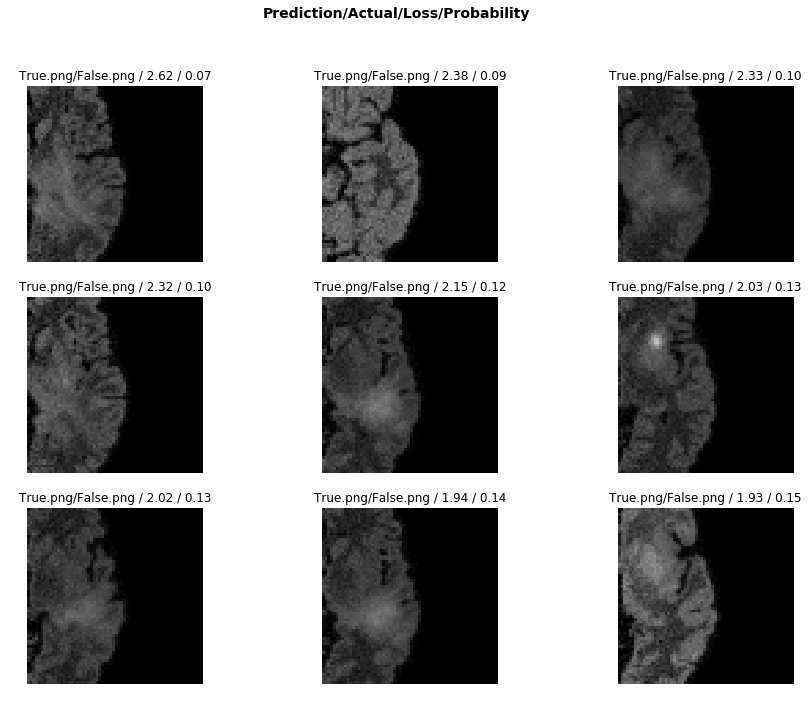

In [90]:
interp.plot_top_losses(9, figsize=(15,11))

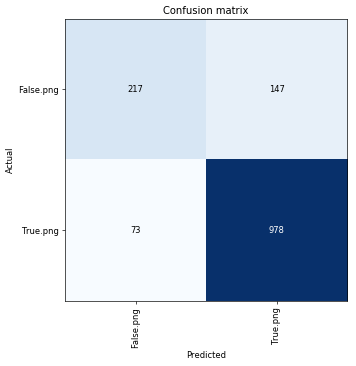

In [92]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

## Unfreeze Body + Fine-tune

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


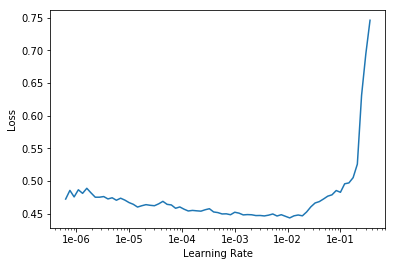

In [20]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,dice,accuracy,time
0,0.404743,0.279352,0.123675,0.876325,0.876325,00:04
1,0.407149,0.280140,0.123675,0.876325,0.876325,00:04
2,0.407840,0.289035,0.125795,0.874205,0.874205,00:04
3,0.420970,0.291004,0.125795,0.874205,0.874205,00:04
4,0.418149,0.284261,0.124382,0.875618,0.875618,00:04
5,0.419941,0.286162,0.124382,0.875618,0.875618,00:04
6,0.423160,0.287665,0.125088,0.874912,0.874912,00:04
7,0.418894,0.286173,0.126502,0.873498,0.873498,00:04
8,0.422932,0.287268,0.127915,0.872085,0.872085,00:05
9,0.427470,0.293938,0.131449,0.868551,0.868551,00:04


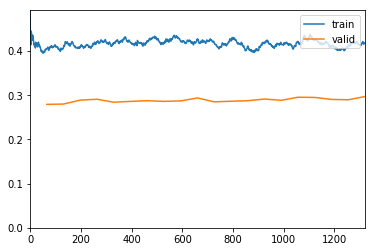

In [23]:
learn.fit_one_cycle(20, max_lr=3e-5)

In [24]:
learn.save('stage-2-34-s64')

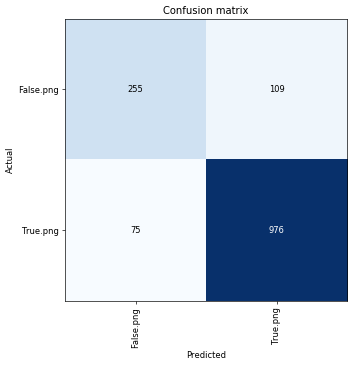

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

### Size = 128

In [108]:
learn.load('stage-2-34-s64')

Learner(data=ImageDataBunch;

Train: LabelList (2125 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
False.png,False.png,True.png,True.png,False.png
Path: /storage/brats2013/brain_segmentation;

Valid: LabelList (1415 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
True.png,True.png,True.png,True.png,True.png
Path: /storage/brats2013/brain_segmentation;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [26]:
data = create_databunch(path, size = 128, batch_size = 32, regex = re)

In [27]:
learn.data = data

In [28]:
learn.freeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


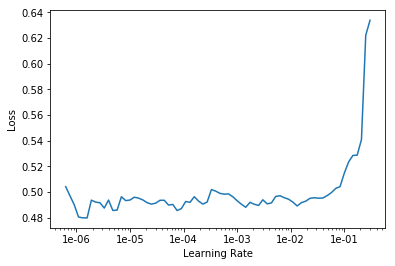

In [34]:
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,dice,accuracy,time
0,0.481133,0.441098,0.209894,0.790106,0.790106,00:05
1,0.486691,0.440825,0.212014,0.787986,0.787986,00:05
2,0.497970,0.459020,0.260071,0.739929,0.739929,00:05
3,0.490681,0.434050,0.210601,0.789399,0.789399,00:05
4,0.480561,0.442574,0.227562,0.772438,0.772438,00:05
5,0.475160,0.460391,0.210601,0.789399,0.789399,00:05
6,0.467417,0.429657,0.192933,0.807067,0.807067,00:05
7,0.473484,0.461477,0.235336,0.764664,0.764664,00:05
8,0.463094,0.439978,0.204947,0.795053,0.795053,00:05
9,0.455878,0.443784,0.209187,0.790813,0.790813,00:05


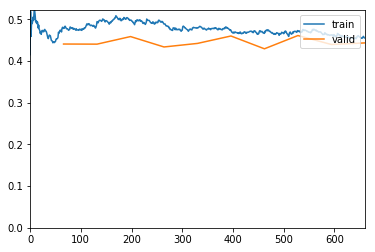

In [35]:
learn.fit_one_cycle(10, max_lr=slice(1e-3, 1e-2))

In [36]:
learn.save('stage-1-34-s128')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


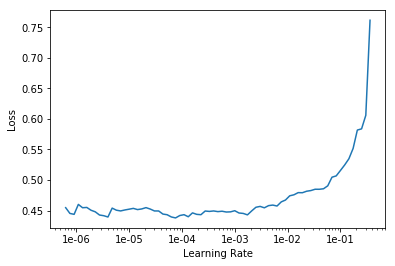

In [38]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,dice,accuracy,time
0,0.485143,0.480055,0.226148,0.773852,0.773852,00:07
1,0.520505,0.479498,0.197880,0.802120,0.802120,00:07
2,0.519518,56.531681,0.166078,0.833922,0.833922,00:07
3,0.491801,0.396854,0.176678,0.823322,0.823322,00:07


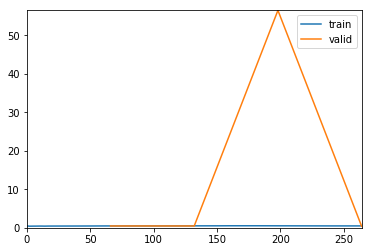

In [39]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-3, 1e-2))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


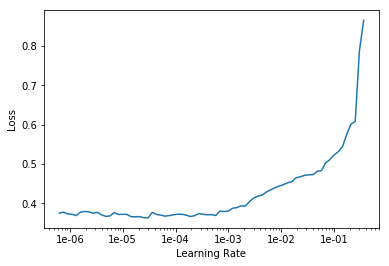

In [101]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

### resnet50

#### Stage 1

In [126]:
data = create_databunch(path, size = 64, batch_size = 32, regex = re)

In [41]:
learn = cnn_learner(data,
                    models.resnet50, 
                    metrics=[error_rate, dice, accuracy],
                    callback_fns = ShowGraph)

epoch,train_loss,valid_loss,error_rate,dice,accuracy,time
0,0.810412,0.559697,0.250883,0.749117,0.749117,00:06
1,0.706312,0.396839,0.191519,0.808481,0.808481,00:04
2,0.603407,0.406519,0.207067,0.792933,0.792933,00:05
3,0.561653,0.382466,0.181625,0.818375,0.818375,00:05
4,0.539492,0.337227,0.154770,0.845230,0.845230,00:05
5,0.519462,0.324258,0.152650,0.847350,0.847350,00:04
6,0.502258,0.331105,0.173852,0.826148,0.826148,00:05
7,0.508247,0.327329,0.168198,0.831802,0.831802,00:04


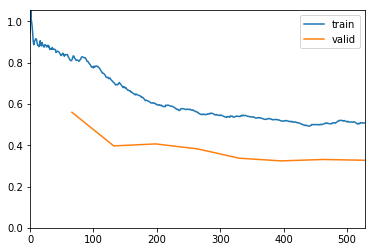

In [42]:
learn.fit_one_cycle(8)

In [43]:
learn.save('stage-1-50-s64')

#### Stage 2

In [46]:
learn.load('stage-1-50-s64')

Learner(data=ImageDataBunch;

Train: LabelList (2125 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
False.png,False.png,True.png,True.png,False.png
Path: /storage/brats2013/brain_segmentation;

Valid: LabelList (1415 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
True.png,True.png,True.png,True.png,True.png
Path: /storage/brats2013/brain_segmentation;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, ep

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


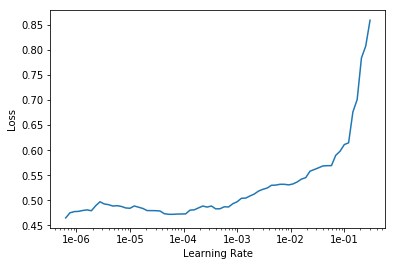

In [47]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [49]:
lr = 1e-2

epoch,train_loss,valid_loss,error_rate,dice,accuracy,time
0,0.540192,0.421248,0.169611,0.830389,0.830389,00:06
1,0.531878,3.557699,0.242403,0.757597,0.757597,00:06
2,0.559127,0.379970,0.184452,0.815548,0.815548,00:06
3,0.546777,0.581674,0.234629,0.765371,0.765371,00:06
4,0.563957,0.588397,0.257244,0.742756,0.742756,00:06
5,0.541673,0.456987,0.277032,0.722968,0.722968,00:06
6,0.531676,0.302151,0.135689,0.864311,0.864311,00:06
7,0.516553,0.421607,0.218375,0.781625,0.781625,00:06
8,0.493066,0.360975,0.132862,0.867138,0.867138,00:06
9,0.469052,0.298966,0.122261,0.877739,0.877739,00:06


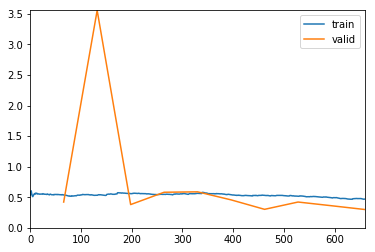

In [50]:
learn.fit_one_cycle(10, max_lr = slice(lr/5, lr))

In [51]:
learn.save('stage-2-50-s64')

#### Stage 3

In [ ]:
learn.load('stage-2-50-s64')

In [150]:
data = create_databunch(path, size = 128, batch_size = 32, regex = re)

In [151]:
learn.data = data

In [58]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


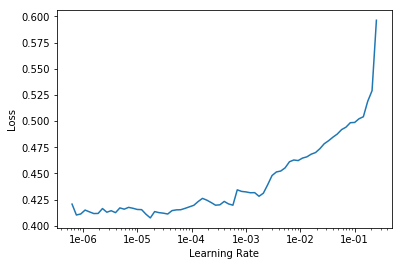

In [61]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,dice,accuracy,time
0,0.505604,0.326146,0.133569,0.866431,0.866431,00:09
1,0.475672,0.576502,0.138516,0.861484,0.861484,00:09
2,0.487072,0.313576,0.130742,0.869258,0.869258,00:09
3,0.494402,3.563427,0.131449,0.868551,0.868551,00:09
4,0.481046,0.318099,0.134276,0.865724,0.865724,00:09
5,0.485325,0.316700,0.129329,0.870671,0.870671,00:08
6,0.483951,0.865070,0.137102,0.862898,0.862898,00:09
7,0.493009,0.322317,0.134982,0.865018,0.865018,00:09
8,0.488267,0.319826,0.129329,0.870671,0.870671,00:09
9,0.483872,0.317554,0.133569,0.866431,0.866431,00:09


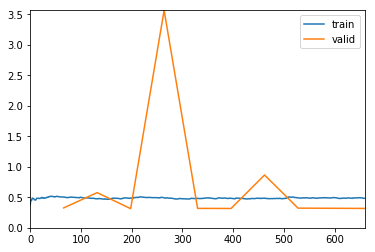

In [153]:
lr = 1e-5
learn.fit_one_cycle(10, max_lr = slice(lr/10, lr))

In [65]:
learn.save('stage-2-50-s128')

In [130]:
learn.load('stage-2-50-s128')

Learner(data=ImageDataBunch;

Train: LabelList (2125 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
False.png,False.png,True.png,True.png,False.png
Path: /storage/brats2013/brain_segmentation;

Valid: LabelList (1415 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
True.png,True.png,True.png,True.png,True.png
Path: /storage/brats2013/brain_segmentation;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1)

### Size = 256

In [154]:
data = create_databunch(path, size = 256, batch_size = 32, regex = re)

In [155]:
learn.data = data

In [156]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


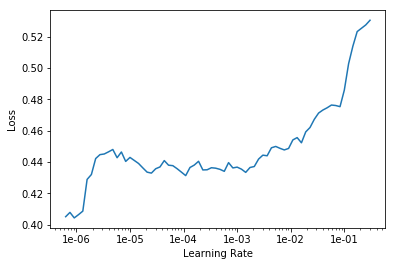

In [161]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,dice,accuracy,time
0,0.522345,1.833878,0.235336,0.764664,0.764664,00:33
1,0.576195,0.319376,0.167491,0.832509,0.832509,00:33
2,0.480279,0.286095,0.116608,0.883392,0.883392,00:33


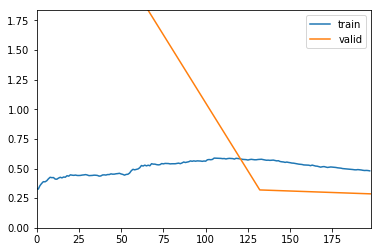

In [162]:
learn.unfreeze();
learn.fit_one_cycle(3, max_lr = slice(1e-5, 5e-2));

In [163]:
learn.save('stage-5-50-s256')

## Export Model

In [164]:
learn.export('export.pkl')

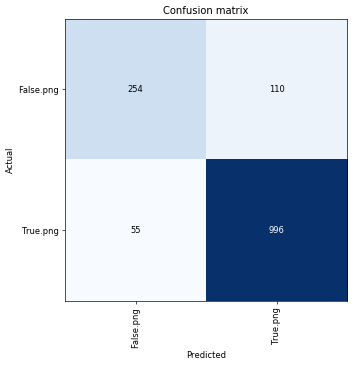

In [165]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

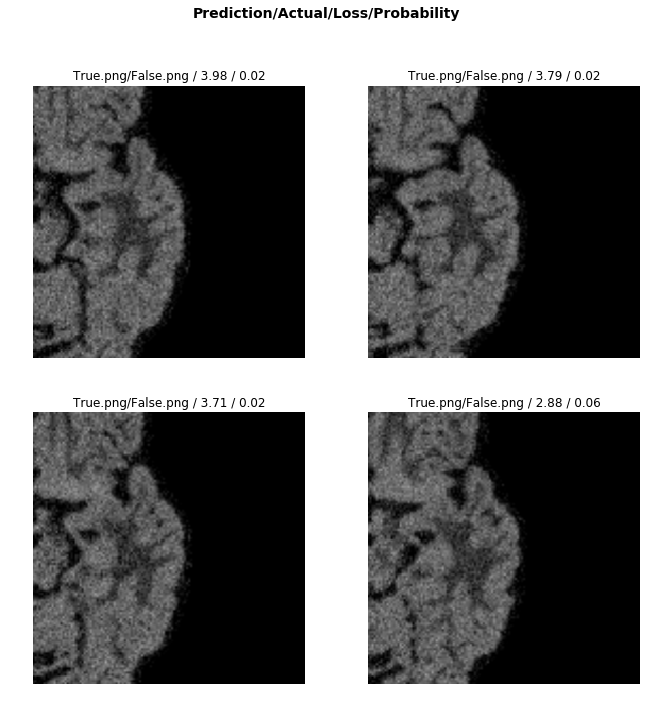

In [166]:
interp.plot_top_losses(4, figsize=(11,11))